# 결정트리(Decision Tree)

결정트리는 분류와 회귀에 널리 사용되는 모델이다. 기본적으로 결정트리는 결정에 다다르기 위해 예/아니오 라는 연속적인 질문을 이어 나가면서 학습한다.

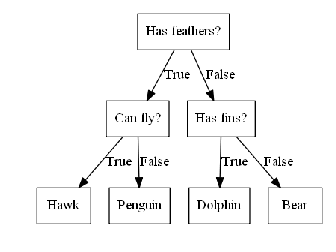

In [2]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
import numpy as np
mglearn.plots.plot_animal_tree()

결정트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 뜻이다. 머신러닝에서 이런 질문을 테스트라고 한다. 트리를 만들 때 알고리즘은 가능한 모든 테스트에서 타깃값에 대해 가장 많은 정보를 가진 것을 고른다.

### 결정트리 복잡도 제어하기

일반적으로 트리를 만들기를 모든 리프노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합하게 된다.

과대적합을 막는 전력은 두가지다. 트리 생성을 일찍 중단하는 전략(사전가지치기)과 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략이다.사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또는 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 것이다.

유방함 데이터를 통해 사전 가지치기의 효과를 알아보자.

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = sklearn.datasets.load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(x_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(x_test,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.937


모든 리프 노드가 순수 노드이므로 훈련세트의 정확도는 100%이다. 즉 트리는 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊게 만들어졌다는 것이다. 

결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있다. 그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않는다.

가자치기를 트리에 적용해 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 멈추어보자

In [15]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

print("훈련 세트 정확도:{:.3f}".format(tree.score(x_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(x_test,y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.951


깊이를 제한하니 과대적합이 줄어 훈련 세트 정확도가 낮아지고 테스트 세트 정확도가 상승한 것을 볼 수 있다.

### 트리의 특성 중요도

전체 트리를 살펴보는 것은 어려울 수 있으니, 대신 트리가 어떻게 작동하는지 요약하는 속성들을 확인할 수 있다. 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도(feature importance)이다.이 값은 각 0과 1사이의 숫자로 각 특성에 대해 0은 전혀 사용되지 않는다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻이다.

In [16]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


이를 시각화해보자

In [38]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)    

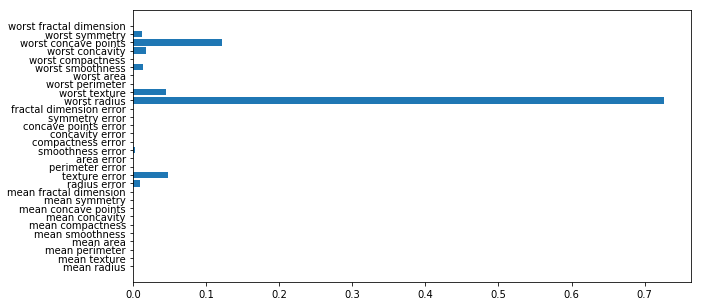

In [40]:
plt.figure(figsize=(10,5))
plot_feature_importance_cancer(tree)

worst radius가 가장 중요한 특성으로 나타난다. 여기서 어떤 특성의 Feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻이 아니다. 단지 트리가 그 특성을 선택하지 않았을 분이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있다. 

여기서 말한 것들은 DecisionTreeRegressor로 구현된 회귀 결정트리에서도 비슷하게 적용된다. 회귀트리 사용법은 분류트리와 유사하다.

DecisionTreeRegressor(그리고 모든 다른 트리기반 회귀모델)은 외삽(etrapolation), 즉 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수가 없다.

컴퓨터 모메리 가격 동향 데이터셋을 이용해 살펴보자

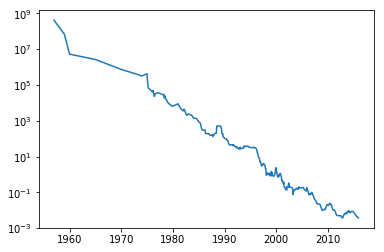

In [46]:
import os
import pandas as pd 
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date,ram_prices.price)

날짜 특성 하나만으로 2000년 전까지의 데이터로부터 2000년 후의 가격을 예측해보겠다. 여기서 간단한 두 모델 DecisionTreeRegressor과 LinearRegression을 비교해 보겠다.

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=2000]

x_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(x_train,y_train)
linear_reg = LinearRegression().fit(x_train,y_train)


x_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

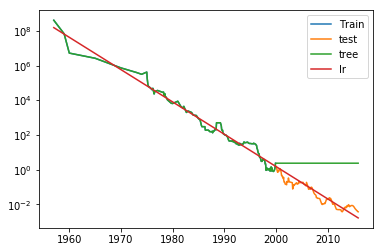

In [50]:
plt.semilogy(data_train.date,data_train.price,label='Train')
plt.semilogy(data_test.date,data_test.price,label='test')
plt.semilogy(ram_prices.date,price_tree,label='tree')
plt.semilogy(ram_prices.date,price_lr,label='lr')
plt.legend()

두 모델은 확연한 차이를 보인다. 트리 모델은 훈련 데이터를 완벽하게 예측한다. 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문이다. 하지만 모델이 가진 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는 것이 전부이다. 

트리 모델은 훈련 데이터의 밖의 새로운 데아터를 예측할 능력이 벗다. 이는 모든 트리기반 모델의 공통된 단점이다. 

### 장단점과 매개변수

결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수이다. 보통 사전가지치기 방법 중 max_dept, max_leaf_nodes 또는 min_sample_leaf 중 하나만 지정해도 과대적합을 막는 데 충분하다.

결정트리의 장점은 2가지를 들수 있다. 첫째, 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉽다. 그리고 데이터의 스케일에 구애받지 않는다. 각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요없다. 특히 특성의 스케일이 서로 다르거나 이진특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동한다. 

결정트리의 주요 단점은 사전 가자치기를 사용함에도 불구하고 과대적합(Overfitting)이 되는 경향이 있어 일반화 성능이 좋지 않다는 것이다.